In [2]:
import numpy as np 
import pandas as pd
import os, re
import matplotlib.pyplot as plt
from tqdm import tqdm
from numba import njit
from time import perf_counter as pc

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# plt.style.use(["notebook", "science"])
plt.rcParams["figure.figsize"] = [15, 7]
plt.rcParams["figure.dpi"] = 150
plt.rcParams["lines.linewidth"] = 2

np.set_printoptions(linewidth=200)
np.set_printoptions(precision=3)

In [97]:
map_path = "raw txt-input 6186 samples 10 nodes/"

dir_list = os.listdir(map_path) # all the files
paths = [file for file in dir_list if file.endswith(".txt")] # filtering out files which is not txt
# a list with arrays 
dataset = [np.loadtxt(map_path + path) for path in tqdm(paths)]

100%|██████████| 6186/6186 [00:53<00:00, 114.90it/s]


Using 5 different seeds {0,1,2,3,4} to generate different perturbations to the original LHGR dataset. The result is a perturbed dataset that is 5 times larger than the original.

In [98]:
def generate_new_LHGR(LHGR, noise_factor=0, seed=0):
    np.random.seed(seed)
    fft_data = np.fft.fft(LHGR)
    noise = noise_factor * np.random.rand(*LHGR.shape)
    fft_data_noise = fft_data + noise
    max_fft_data = np.max(np.abs(fft_data))
    fft_data_clipped = np.where(np.abs(fft_data_noise) > max_fft_data, 
                                fft_data, 
                                fft_data_noise)
    frequency_data = np.fft.ifft(fft_data_clipped)
    return np.abs(frequency_data.real)


def generate_new_LHGRs(dataset, noise_factor=0, seed=0):
    new_LHGRs = []
    for i, data in tqdm(enumerate(dataset)):
        LHGR_perturbed = generate_new_LHGR(data, noise_factor, seed)
        new_LHGRs.append(LHGR_perturbed)
    return new_LHGRs
    
new_dataset = [generate_new_LHGRs(dataset, 20, seed) for seed in range(5)]
result = np.asanyarray(new_dataset, dtype=object).flatten()

6186it [00:00, 11277.50it/s]
6186it [00:00, 13719.08it/s]
6186it [00:00, 13594.23it/s]
6186it [00:00, 16906.17it/s]
6186it [00:00, 17479.96it/s]


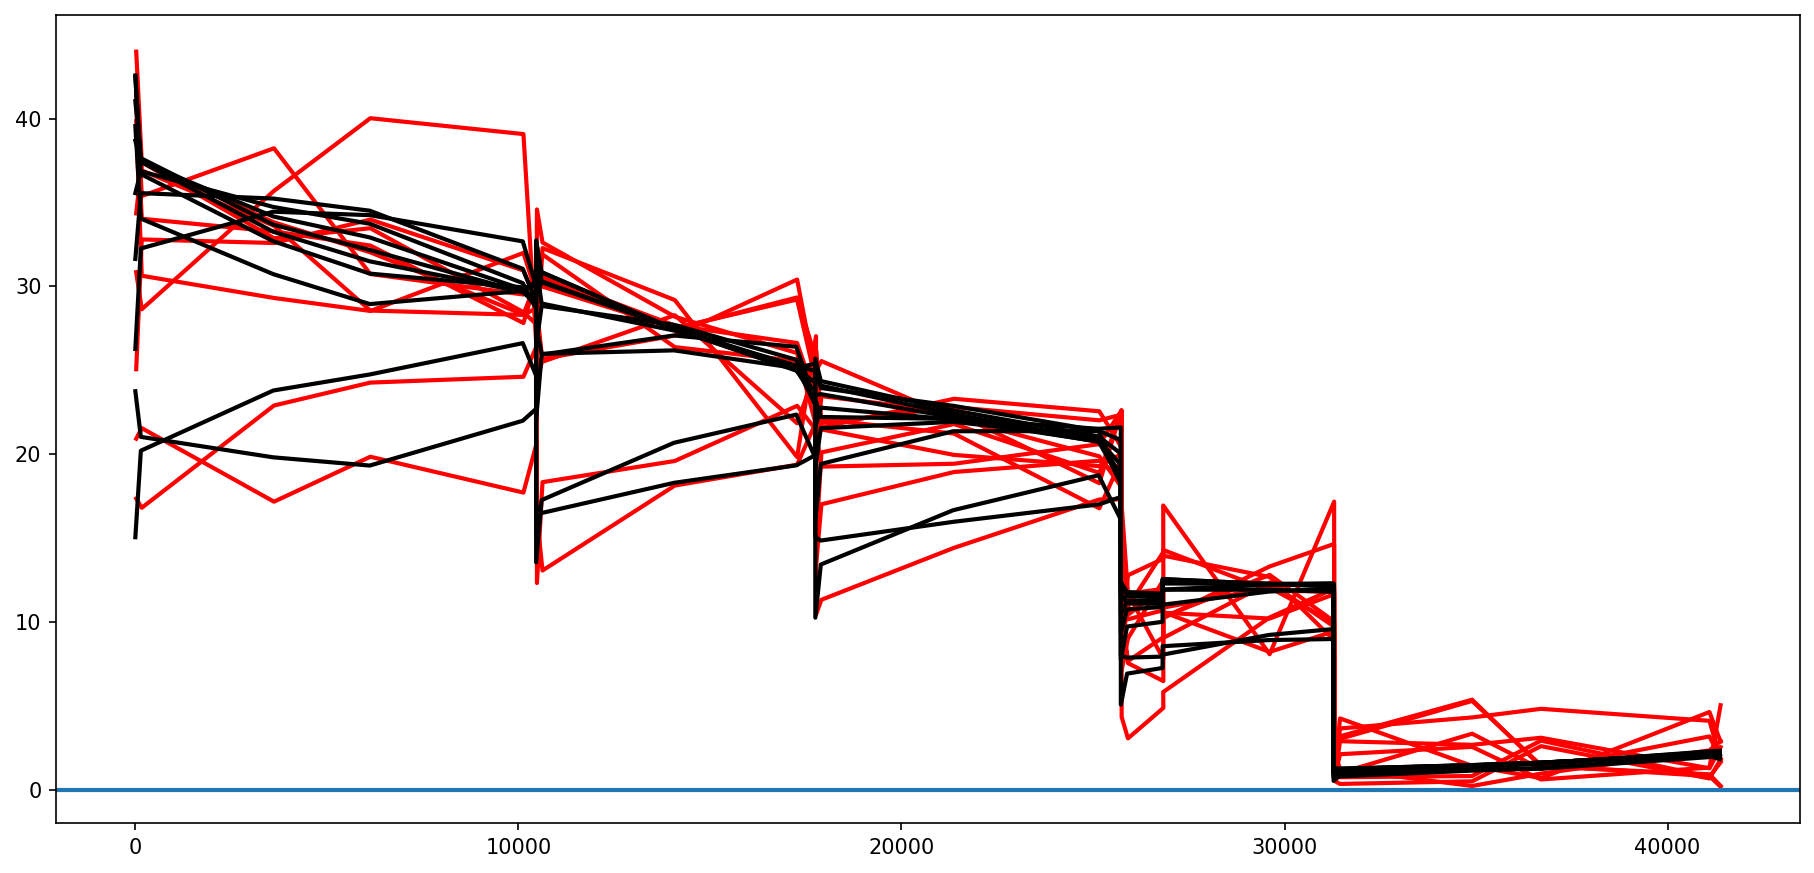

In [92]:
x = result.flatten()

i = np.random.randint(0, 4889)
t = x[i][:,0]
y = x[i][:,6:]
plt.plot(t, y, "r-")
plt.plot(dataset[i][:,0], dataset[i][:,6:], "k-")
plt.axhline(0)

In [ ]:
#np.save("raw npy-input 24445 samples 10 nodes/perturbed_LHGR_dataset.npy", result)
np.save("raw npy-input 30930 samples 10 nodes/perturbed_LHGR_dataset.npy", result)

In [23]:
dataset1 = np.load("raw npy-input 30930 samples 10 nodes/perturbed_LHGR_dataset.npy", allow_pickle=True)
dataset2 = np.load("raw npy-input 24445 samples 10 nodes/perturbed_LHGR_dataset.npy", allow_pickle=True)
total_dataset = np.concatenate([dataset1, dataset2], axis=-1).flatten() 